In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [28]:
#lecture du csv implifié auparavant par une étape de cleaning et de préprocessing du fichier mère transactions.csv:
# périmètre Idf 2022
# rajout des variables calculés prixm2 et typ_bat (valeur 0 ou 1)
idf_df = pd.read_csv('transactions_idf.csv')

In [9]:
X = idf_df[['longitude','latitude','type_bat','vefa','n_pieces', 'code_postal']].values
y = idf_df['prix_m2'].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(109781, 6) (109781,)
(21957, 6) (21957,)
(87824, 6) (87824,)


In [12]:
y

array([10997.        , 11630.76923077, 11271.18644068, ...,
        2443.39622642,  6546.39175258,  2428.57142857])

<Axes: >

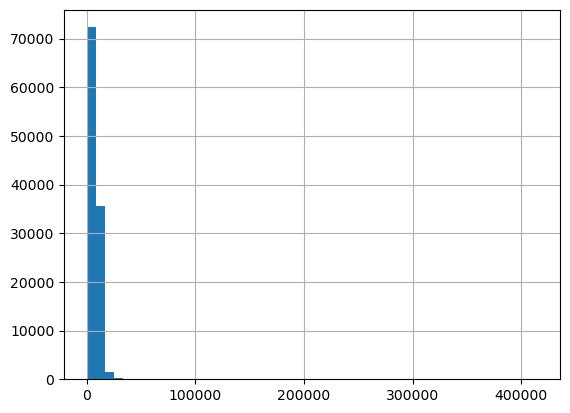

In [14]:
idf_df.prix_m2.hist(bins=50)

In [25]:
idf_df[idf_df.prix_m2 > 50000]
# valeurs extremes mais pas d'explication métier: probable cas de bien ultraluxueux

,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,vefa,...,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature,prix_m2,type_bat,surface_dependances_sum,surface_locaux_industriels_sum,surface_terrains_agricoles_sum,surface_terrains_sols_sum,surface_terrains_nature_sum
4743,10057507,2022-02-25,9200000.0,75,106,PARIS 06,75006,5 QUAI MALAQUAIS,Appartement,False,...,{},{},{},97872.340426,1,0,0,0,0,0
6935,10049450,2022-03-22,21500000.0,75,101,PARIS 01,75001,50 QUAI DES ORFEVRES,Appartement,False,...,{},{},{},82692.307692,1,0,0,0,0,0
7390,10031556,2022-03-28,8450000.0,75,108,PARIS 08,75008,35 RUE DU ROCHER,Appartement,False,...,{},{},{},338000.000000,1,0,0,0,0,0
8876,10071956,2022-04-12,1350000.0,75,106,PARIS 06,75006,12 RUE JACOB,Appartement,False,...,{},{},{},67500.000000,1,0,0,0,0,0
9392,10030795,2022-04-15,376000.0,75,107,PARIS 07,75007,3 RUE ROUSSELET,Appartement,False,...,{},{},{},53714.285714,1,0,0,0,0,0
9626,10028334,2022-04-20,10977400.0,75,108,PARIS 08,75008,85B RUE DU FAUBOURG SAINT HONORE,Appartement,False,...,{},{},{},51780.188679,1,0,0,0,0,0
17721,10048943,2022-07-05,352000.0,75,105,PARIS 05,75005,118 RUE MONGE,Appartement,False,...,{},{},{},50285.714286,1,0,0,0,0,0
19823,10038314,2022-07-22,14000000.0,75,106,PARIS 06,75006,34 RUE GUYNEMER,Appartement,False,...,{},{},{},62780.269058,1,0,0,0,0,0
31162,10036436,2022-11-23,3000000.0,75,112,PARIS 12,75012,11 RUE HECTOR MALOT,Appartement,False,...,{},{},{},50847.457627,1,0,0,0,0,0
58340,12586635,2022-02-18,415000.0,92,26,COURBEVOIE,92400,47 BD SAINT DENIS,Appartement,False,...,{},{},{},415000.000000,1,0,0,0,0,0


In [26]:
idf_df[idf_df.prix_m2 < 50]

,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,vefa,...,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature,prix_m2,type_bat,surface_dependances_sum,surface_locaux_industriels_sum,surface_terrains_agricoles_sum,surface_terrains_sols_sum,surface_terrains_nature_sum
195,10042374,2022-01-06,1200.00,75,118,PARIS 18,75018,3 RUE POULET,Appartement,False,...,{},{},{},30.000000,1,0,0,0,0,0
442,10034947,2022-01-10,450.00,75,110,PARIS 10,75010,10 RUE DU FBG SAINT DENIS,Appartement,False,...,{},{},{},32.142857,1,0,0,0,0,0
468,10042586,2022-01-10,1.00,75,109,PARIS 09,75009,4 RUE DE L AGENT BAILLY,Appartement,False,...,{},{},{},0.015625,1,0,0,0,0,0
631,10043991,2022-01-11,100.00,75,120,PARIS 20,75020,72 RUE DE BELLEVILLE,Appartement,False,...,{},{},{},2.380952,1,0,0,0,0,0
900,10073084,2022-01-14,1000.00,75,110,PARIS 10,75010,212 RUE LA FAYETTE,Appartement,False,...,{},{},{},32.258065,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105934,13382791,2022-07-12,1.86,95,18,ARGENTEUIL,95100,8 ALL HENRI WALLON,Appartement,False,...,{},{},{},0.029524,1,0,0,0,0,0
106952,13376010,2022-08-29,500.00,95,63,BEZONS,95870,93 RUE KARL MARX,Appartement,False,...,{},{},{},20.833333,1,0,0,0,0,0
107962,13365915,2022-10-04,2100.00,95,500,PONTOISE,95300,16 RUE ERIC DE MARTIMPREY,Appartement,False,...,{},{},{},28.000000,1,0,0,0,0,0
109230,13380818,2022-12-08,1500.00,95,394,MERY-SUR-OISE,95540,5 RUE DE L ISLE ADAM,Appartement,False,...,{},{},{},35.714286,1,0,0,0,0,0


In [15]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

models = {LinearRegression(), DecisionTreeRegressor(max_depth=11, min_samples_leaf=80), KNeighborsRegressor(n_neighbors=50), RandomForestRegressor(max_depth=50, min_samples_leaf=20, n_estimators=500)}

for model in models:
    model.fit(X_train, y_train)
    #plot_with_contour(model, X, y)
    print(f"Model is : {model}" )
    print("Score model on train is :" + str(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print("Score model on test is :" + str(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))


Model is : DecisionTreeRegressor(max_depth=11, min_samples_leaf=80)
Score model on train is :2714.354802951252
Score model on test is :3494.4150002022934
Model is : KNeighborsRegressor(n_neighbors=50)
Score model on train is :2705.8492958075035
Score model on test is :3489.240530020634
Model is : LinearRegression()
Score model on train is :3562.7437272271854
Score model on test is :4165.584147327099
Model is : RandomForestRegressor(max_depth=50, min_samples_leaf=20, n_estimators=500)
Score model on train is :2556.992814137017
Score model on test is :3451.922135492969


In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params_grid = {
                'DTR': {
                    'model': DecisionTreeRegressor(),
                    'params': {
                        'max_depth': [11, 12],
                        'min_samples_leaf': [80, 70]
                    }
                },
                'RFR': {
                    'model': RandomForestRegressor(),
                    'params': {
                        'max_depth': [50, 30],
                        'min_samples_leaf': [20],
                        'n_estimators': [500, 200]
                    }
                }
            }

for model_name, model_config in params_grid.items():
    gs = GridSearchCV(estimator=model_config['model'], 
                      param_grid=model_config['params'],
                     n_jobs= -1,
                     verbose = 3)
    gs.fit(X_train, y_train)
    print(f'Modèle: {model_name} avec params optimaux: {gs.best_params_} donne erreur =')
    print(np.sqrt(mean_squared_error(y_test, gs.best_estimator_.predict(X_test))))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Modèle: DTR avec params optimaux: {'max_depth': 12, 'min_samples_leaf': 70} donne erreur =
2937.3828892646325
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Modèle: RFR avec params optimaux: {'max_depth': 50, 'min_samples_leaf': 20, 'n_estimators': 200} donne erreur =
2891.8503660979945


In [18]:
bestmodel = RandomForestRegressor(max_depth = 50, min_samples_leaf=20, n_estimators =500)
bestmodel_fit = bestmodel.fit(X_train, y_train)

print(f"Model is : {bestmodel}" )
print("Score model on train is :" + str(np.sqrt(mean_squared_error(y_train, bestmodel.predict(X_train)))))
print("Score model on test is :" + str(np.sqrt(mean_squared_error(y_test, bestmodel.predict(X_test)))))


Model is : RandomForestRegressor(max_depth=50, min_samples_leaf=20, n_estimators=500)
Score model on train is :2710.75516851444
Score model on test is :2892.063179579625


<Axes: >

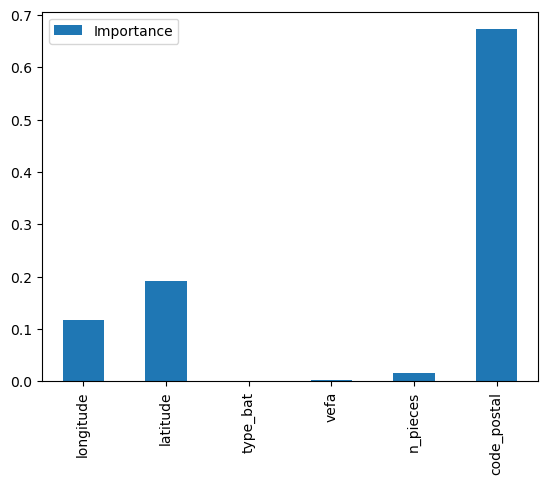

In [19]:
pd.DataFrame(bestmodel_fit.feature_importances_, index=['longitude', 'latitude', 'type_bat', 'vefa', 'n_pieces', 'code_postal'], columns=['Importance']).plot.bar()

In [20]:
X = idf_df[['longitude','latitude','n_pieces', 'code_postal']].values
y = idf_df['prix_m2'].values
bestmodel.fit(X, y)

RandomForestRegressor(max_depth=50, min_samples_leaf=20, n_estimators=500)

In [21]:
import pickle
from pprint import pprint

pickle.dump(bestmodel, open('prediction_price_model.pkl', 'wb'))
reloaded_model = pickle.load(open('prediction_price_model.pkl', 'rb'))